# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [5]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
final_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

# Display the data table for preview
final_df = final_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
final_df.sort_values(by="Drug Regimen",ascending=True)
final_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [8]:
# Checking the number of mice.
final_df["Mouse ID"].nunique()

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = final_df.loc[final_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_df

array(['g989'], dtype=object)

In [10]:
# Getting all the data for the duplicate mouse ID. 
duplicates = final_df.loc[final_df["Mouse ID"] == "g989", :]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = final_df[final_df['Mouse ID'].isin(duplicate_df)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [12]:
# Checking the number of mice in the clean DataFrame.
mice = clean_df['Mouse ID'].value_counts()
mice_num = len(mice)
mice_num

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
standard_deviation = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]


# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean Tumor Volume": mean, 
                                    "Median Tumor Volume":median, 
                                    "Tumor Volume Variance":variance, 
                                    "Tumor Volume Std. Dev.": standard_deviation, 
                                    "Tumor Volume Std. Err.": sem})
summary

C:\Users\sandy\AppData\Local\Temp\ipykernel_28320\4265786260.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
C:\Users\sandy\AppData\Local\Temp\ipykernel_28320\4265786260.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
C:\Users\sandy\AppData\Local\Temp\ipykernel_28320\4265786260.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or s

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

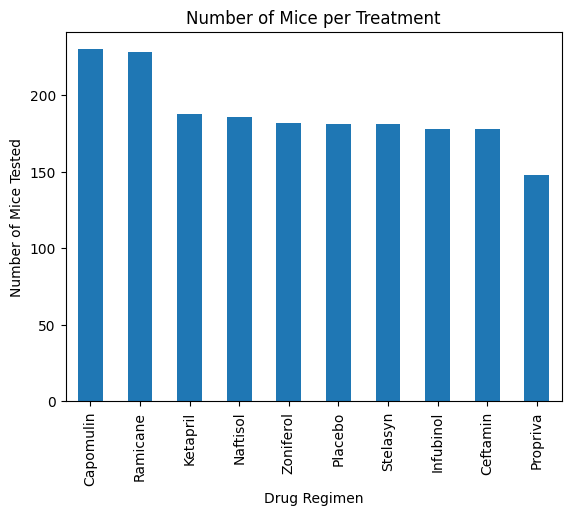

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice = clean_df["Drug Regimen"].value_counts()
chart = mice.plot.bar(color='tab:blue')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice per Treatment")
plt.show()



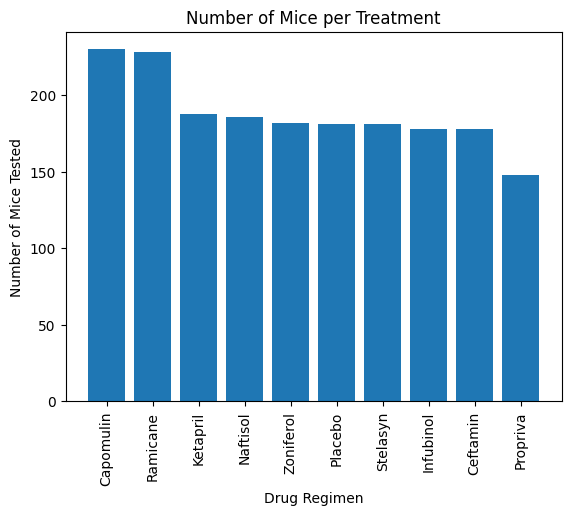

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice.index.values
y_axis = mice.values
plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Treatment")
plt.show()

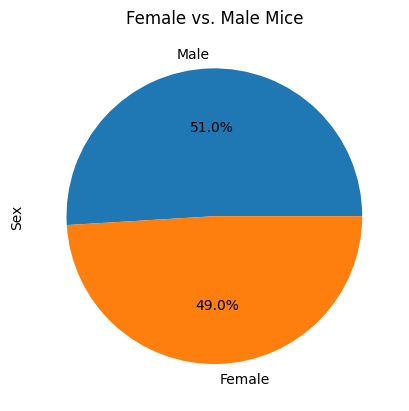

In [18]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas
m_f = clean_df["Sex"].value_counts()
m_f.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

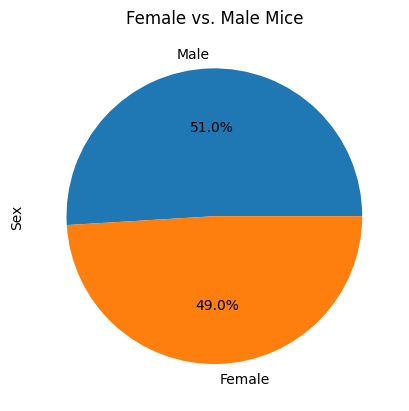

In [20]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.8989395, 50.700902]
plot = m_f.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
timepoint = final_df.groupby(["Mouse ID"]).max()
timepoint = timepoint.reset_index()

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_df = timepoint[['Mouse ID','Timepoint']].\
    merge(final_df,on=['Mouse ID','Timepoint'],how="left")

In [22]:

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Determine outliers using upper and lower bounds
def outliers(regimen):
    regimen_data = timepoint_df.loc[timepoint_df["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)
    
# Determining outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data
    
cap = outliers("Capomulin")
ram = outliers("Ramicane")
inf = outliers("Infubinol")
ceft = outliers("Ceftamin")




Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


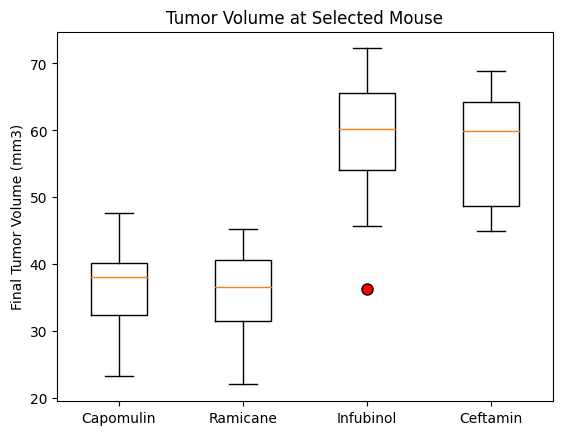

In [23]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group.
mark = dict(markerfacecolor = "red", markersize=8)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= mark)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

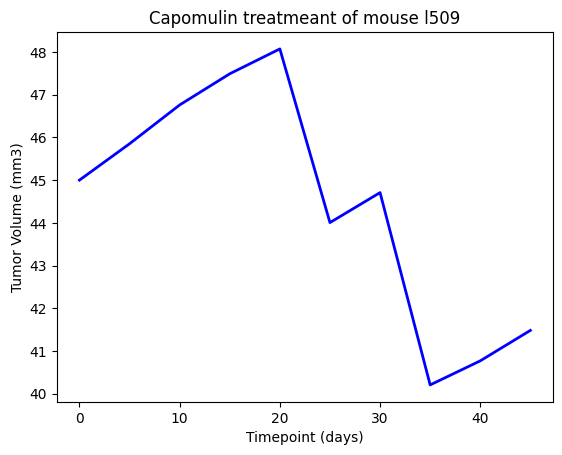

In [24]:

# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

forline_df = capomulin.loc[capomulin["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

C:\Users\sandy\AppData\Local\Temp\ipykernel_28320\838518826.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol =capomulin.groupby(['Mouse ID']).mean()


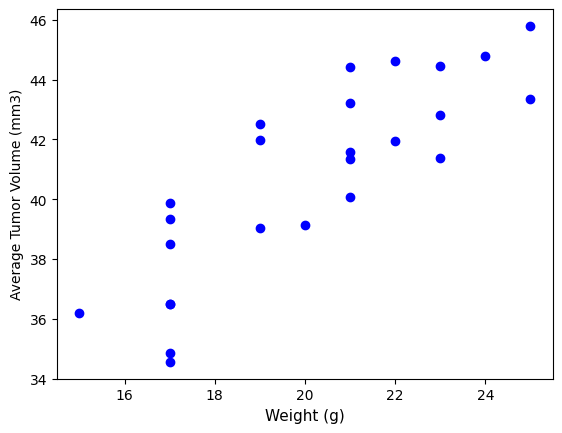

In [25]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =capomulin.groupby(['Mouse ID']).mean()
marker_size=10
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)',fontsize =11)
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()